# FORECASTING MODELS (Time-Series)


In [1]:
#import lux
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#import plotly as go

In [3]:
data = pd.read_csv(r'timeseries_salesdata.csv',delimiter=",")
data.set_index("Date", inplace =True)
data2 = data.copy()
print(data.head())
print(data2.head())

             Sales
Date              
11-Apr-18  4388.23
12-Apr-18  5206.76
13-Apr-18  1784.65
14-Apr-18  2419.71
15-Apr-18  2462.46
             Sales
Date              
11-Apr-18  4388.23
12-Apr-18  5206.76
13-Apr-18  1784.65
14-Apr-18  2419.71
15-Apr-18  2462.46


In [4]:
data.tail()

,Sales
Date,
27-Dec-20,3116.25
28-Dec-20,7736.05
29-Dec-20,6981.61
30-Dec-20,3702.45
31-Dec-20,5132.95


In [5]:
import pandas as pd 
import statsmodels.api as sm
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

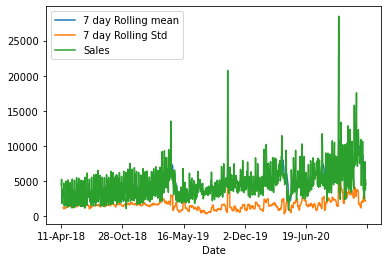

In [6]:
timeseries = data['Sales']
timeseries.rolling(7).mean().plot(label = "7 day Rolling mean")
timeseries.rolling(7).std().plot(label = "7 day Rolling Std")
timeseries.plot()
plt.plot(data['Sales'].mean())
plt.legend()

In [7]:
#plt.plot(data['Sales'].mean())

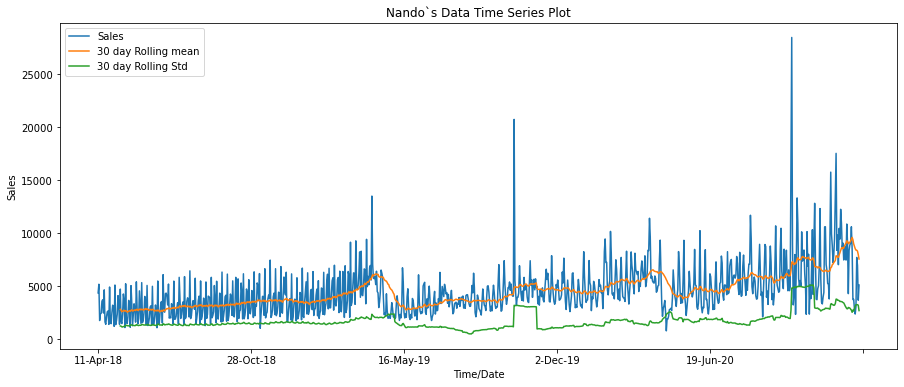

In [8]:

data['Sales'].plot(figsize=(15,6))
data['Sales'].rolling(30).mean().plot(label = "30 day Rolling mean")
data['Sales'].rolling(30).std().plot(label = "30 day Rolling Std")
pyplot.xlabel("Time/Date")
pyplot.ylabel("Sales")
pyplot.title("Nando`s Data Time Series Plot")
pyplot.savefig("series plot.png")
pyplot.legend()
pyplot.show()

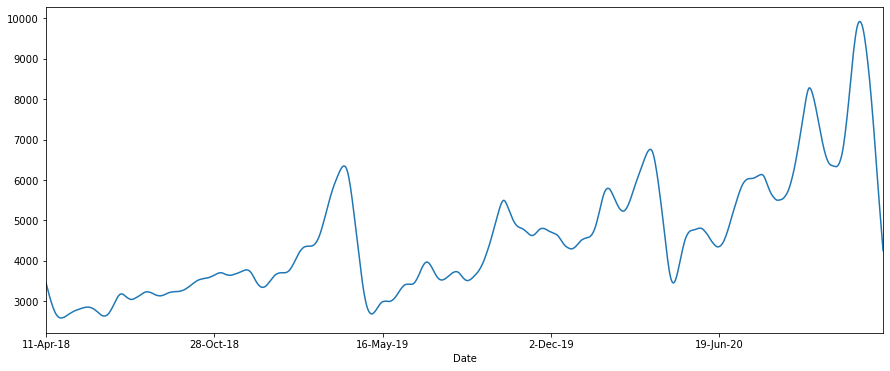

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter
Sales_cycle,Sales_trend = hpfilter(data2['Sales'], lamb=1600)
Sales_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

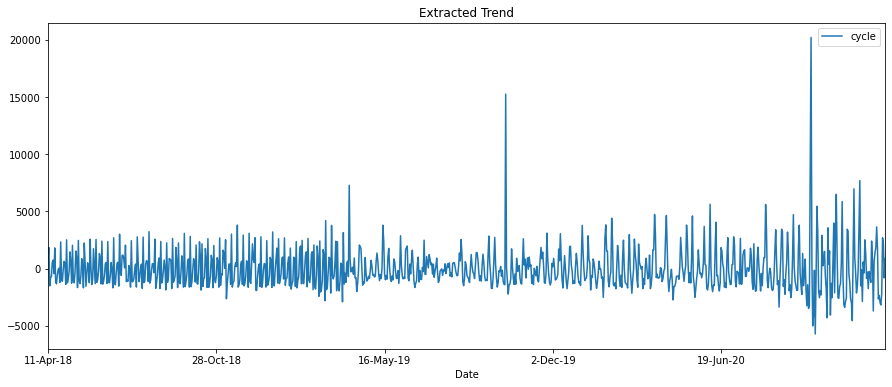

In [10]:
data2['cycle'] =Sales_cycle
data2['trend'] =Sales_trend
data2[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title("Extracted Trend")
plt.show()

In [11]:
data2

,Sales,cycle,trend
Date,,,
11-Apr-18,4388.23,939.269449,3448.960551
12-Apr-18,5206.76,1839.693941,3367.066059
13-Apr-18,1784.65,-1501.108611,3285.758611
14-Apr-18,2419.71,-787.065059,3206.775059
15-Apr-18,2462.46,-668.454061,3130.914061
...,...,...,...
27-Dec-20,3116.25,-2177.402411,5293.652411
28-Dec-20,7736.05,2705.049030,5031.000970
29-Dec-20,6981.61,2211.234424,4770.375576


In [12]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[5] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [13]:
Augmented_Dickey_Fuller_Test_func(data,'Sales')

Results of Dickey-Fuller Test for column: Sales
Test Statistic                  -3.062352
p-value                          0.029468
No Lags Used                    21.000000
Number of Observations Used    974.000000
Critical Value (1%)             -3.437082
Critical Value (5%)             -2.864512
Critical Value (10%)            -2.568352
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [14]:
'''
from sklearn.model_selection import train_test_split
X = data[["Customers"]]
y = data[["Sales"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle = False)
'''

'\nfrom sklearn.model_selection import train_test_split\nX = data[["Customers"]]\ny = data[["Sales"]]\nX_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle = False)\n'

## TIME SERIES ANALYSIS

In [15]:
y_train = data[:900]
y_test = data[900:]
test=y_test.copy
len(y_test)

96

In [16]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

## Smoothing Time Series Models

In [17]:
#SIMPLE EXPONENTIAL SMOOTHING
from statsmodels.tsa.api import SimpleExpSmoothing
simple_exponential = SimpleExpSmoothing(np.asarray(y_train)).fit( optimized= True, use_brute = True)
forecast_SE = simple_exponential.forecast(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_SE))
print(simple_exponential.summary())



C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Evaluation metric results:-
MSE is : 16628189.035074601
MAE is : 2912.3692427769843
RMSE is : 4077.7676533950043
MAPE is : 41.47395277478234
R2 is : -0.11657035030762253

None
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  900
Model:             SimpleExpSmoothing   SSE                     2496296010.233
Optimized:                       True   AIC                          13356.111
Trend:                           None   BIC                          13365.716
Seasonal:                        None   AICC                         13356.156
Seasonal Periods:                None   Date:                 Wed, 16 Jun 2021
Box-Cox:                        False   Time:                         06:35:22
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
----------------------------------

In [19]:
forecast_se = np.array(forecast_SE).reshape(96,1)
forecast_se = pd.DataFrame(forecast_se)
forecast_se=forecast_se.rename(columns={0:'SES'})
forecast_se.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_SESforecasts_dataframe.csv",index = False,header=True)

In [20]:
actual_fore = y_test
actual_fore=actual_fore.rename(columns={"Sales":"Actual Sales"})
actual_fore["SES"]=forecast_se.values
SES=actual_fore

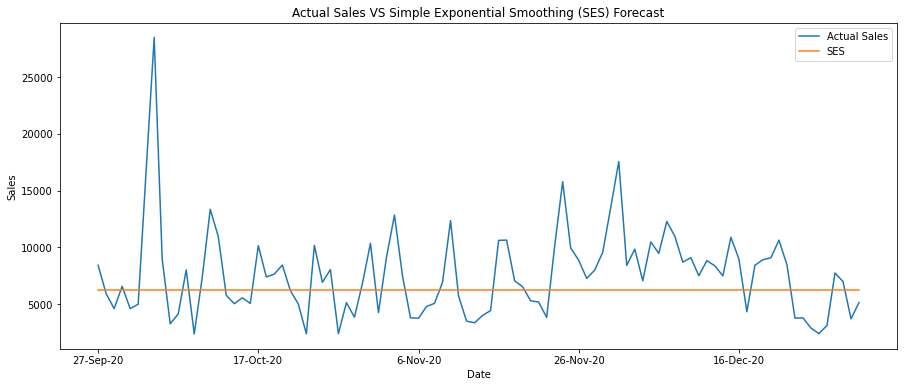

In [21]:
SES['Actual Sales'].plot(figsize=(15,6))
SES['SES'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Simple Exponential Smoothing (SES) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [22]:
simple_exponential.summary()

Dep. Variable:,endog,No. Observations:,900
Model:,SimpleExpSmoothing,SSE,2496296010.233
Optimized:,True,AIC,13356.111
Trend:,None,BIC,13365.716
Seasonal:,None,AICC,13356.156
Seasonal Periods:,None,Date:,"Wed, 16 Jun 2021"
Box-Cox:,False,Time:,06:36:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0873837,alpha,True
initial_level,2925.8300,l.0,True


In [23]:
residual_se = y_test.values-forecast_se.values

In [24]:
import seaborn as sns
import scipy.stats as sp
from seaborn_qqplot import pplot

In [25]:
'''


fig, ax = plt.subplots(3, 3,sharex=True,sharey=True)

fig.suptitle('Axes values are scaled individually by default')

ax[0, 0].scatter(ypred_dctree,residual_dctree)
ax[1, 0].scatter(y_predSupportVectorReg,residual_SVR)
ax[0, 1].scatter(y_pred,residual)
ax[1, 1].scatter(y_predRandomForest,residual_rf)
ax[0, 0].scatter(y_prefply,residual_poly)
ax[1, 1].scatter(y_pred,residual)
'''

"\n\n\nfig, ax = plt.subplots(3, 3,sharex=True,sharey=True)\n\nfig.suptitle('Axes values are scaled individually by default')\n\nax[0, 0].scatter(ypred_dctree,residual_dctree)\nax[1, 0].scatter(y_predSupportVectorReg,residual_SVR)\nax[0, 1].scatter(y_pred,residual)\nax[1, 1].scatter(y_predRandomForest,residual_rf)\nax[0, 0].scatter(y_prefply,residual_poly)\nax[1, 1].scatter(y_pred,residual)\n"

In [26]:
'''
fig, axes = pyplot.subplots(2,2, figsize = (18,10))
fig.suptitle("SimpleExpSmoothing Diagonistics")

sns.pplot(ax=axes[0,0], x=residual, y= gamma, kind="qq",display_kws={"identity":False, "Fit":True},'reg':True,"ci":0.025})
'''

'\nfig, axes = pyplot.subplots(2,2, figsize = (18,10))\nfig.suptitle("SimpleExpSmoothing Diagonistics")\n\nsns.pplot(ax=axes[0,0], x=residual, y= gamma, kind="qq",display_kws={"identity":False, "Fit":True},\'reg\':True,"ci":0.025})\n'

In [27]:
#pplot( data=residual, kind="qq")

In [28]:
#DOUBLE EXPONENTIAL SMOOTHING
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
double_exponential = Holt(y_train).fit(optimized= True, use_brute = True)
forecast_DE = double_exponential.forecast(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_DE))
print(double_exponential.summary())


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Evaluation metric results:-
MSE is : 21179613.347717002
MAE is : 3497.779812783718
RMSE is : 4602.131391835418
MAPE is : 69.65249390872876
R2 is : -0.4221950595556403

None
                              Holt Model Results                              
Dep. Variable:                  Sales   No. Observations:                  900
Model:                           Holt   SSE                     2698459129.501
Optimized:                       True   AIC                          13430.197
Trend:                       Additive   BIC                          13449.406
Seasonal:                        None   AICC                         13430.291
Seasonal Periods:                None   Date:                 Wed, 16 Jun 2021
Box-Cox:                        False   Time:                         06:36:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
-------------------------------------

In [29]:
#np.array(forecast_DE).reshape(96,1)
double_exponential.summary()

Dep. Variable:,Sales,No. Observations:,900
Model:,Holt,SSE,2698459129.501
Optimized:,True,AIC,13430.197
Trend:,Additive,BIC,13449.406
Seasonal:,None,AICC,13430.291
Seasonal Periods:,None,Date:,"Wed, 16 Jun 2021"
Box-Cox:,False,Time:,06:36:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1968304,alpha,True
smoothing_trend,0.0879221,beta,True


In [30]:
#np.array(forecast_DE).reshape(96,1)


In [32]:
forecast_de = np.array(forecast_DE).reshape(96,1)
forecast_de = pd.DataFrame(forecast_de)
forecast_de=forecast_de.rename(columns={0:'DES'})
forecast_de.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_DESforecasts_dataframe.csv",index = False,header=True)

In [33]:
actual_fore["Holt Model"]=forecast_de.values
DES=actual_fore

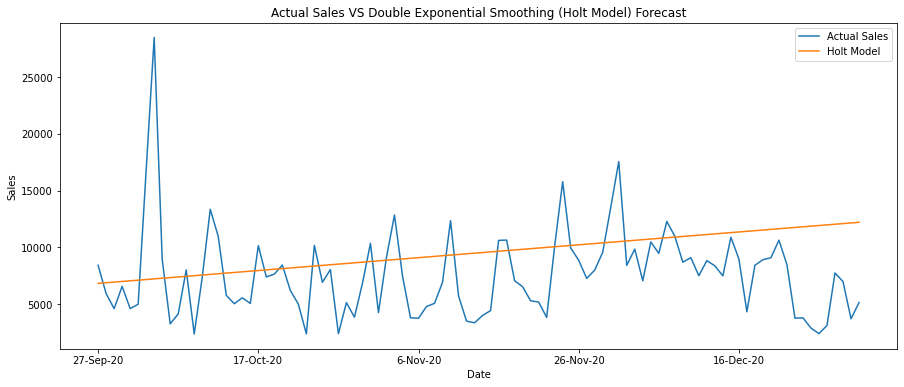

In [34]:
DES['Actual Sales'].plot(figsize=(15,6))
DES['Holt Model'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Double Exponential Smoothing (Holt Model) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [35]:
# TRIPPLE EXPONENTIAL SMOOTHING
from statsmodels.tsa.api import ExponentialSmoothing
tripple_exponential = ExponentialSmoothing(y_train).fit(optimized= True, use_brute = True)
forecast_TE = tripple_exponential.forecast(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_TE))
print(tripple_exponential.summary())


Evaluation metric results:-
MSE is : 16628189.035074601
MAE is : 2912.3692427769843
RMSE is : 4077.7676533950043
MAPE is : 41.47395277478234
R2 is : -0.11657035030762253

None
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                  900
Model:             ExponentialSmoothing   SSE                     2496296010.233
Optimized:                         True   AIC                          13356.111
Trend:                             None   BIC                          13365.716
Seasonal:                          None   AICC                         13356.156
Seasonal Periods:                  None   Date:                 Wed, 16 Jun 2021
Box-Cox:                          False   Time:                         06:40:31
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
----------------

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [36]:
tripple_exponential.summary()
#np.array(forecast_TE).reshape(96,1)

Dep. Variable:,Sales,No. Observations:,900
Model:,ExponentialSmoothing,SSE,2496296010.233
Optimized:,True,AIC,13356.111
Trend:,None,BIC,13365.716
Seasonal:,None,AICC,13356.156
Seasonal Periods:,None,Date:,"Wed, 16 Jun 2021"
Box-Cox:,False,Time:,06:40:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0873837,alpha,True
initial_level,2925.8300,l.0,True


In [37]:
#np.array(forecast_TE).reshape(96,1)

In [38]:
forecast_te = np.array(forecast_TE).reshape(96,1)
forecast_te = pd.DataFrame(forecast_te)
forecast_te=forecast_te.rename(columns={0:'TES'})
forecast_te.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_TESforecasts_dataframe.csv",index = False,header=True)

In [39]:
actual_fore["Holt-Winters"]=forecast_te.values
TES=actual_fore

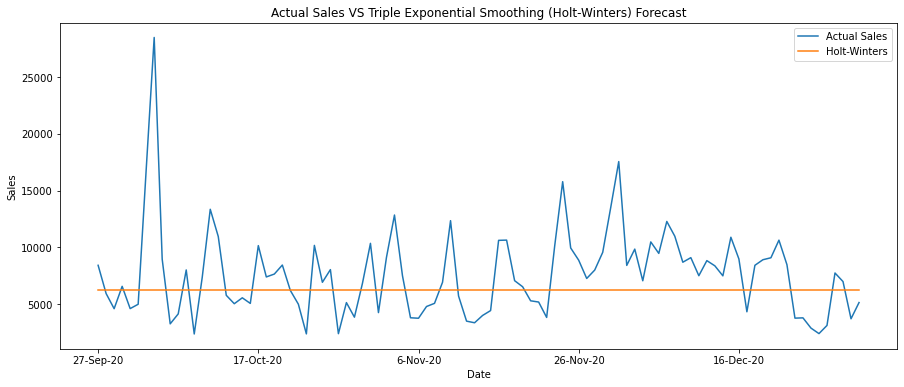

In [40]:
TES['Actual Sales'].plot(figsize=(15,6))
TES['Holt-Winters'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Triple Exponential Smoothing (Holt-Winters) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [42]:
residuals = pd.read_csv(r'res2.csv')
residuals.head()

,SimpleExpSmoothing,Holt Model,ExponentialSmoothing
0,-685.246908,-1003.535672,-685.246908
1,-1977.246908,-2319.082184,-1977.246908
2,-1852.446908,-2217.828697,-1852.446908
3,-1392.096908,-1781.025210,-1392.096908
4,-1326.196908,-1738.671723,-1326.196908


In [43]:
residuals.SimpleExpSmoothing

0     -685.246908
1    -1977.246908
2    -1852.446908
3    -1392.096908
4    -1326.196908
         ...     
86    1433.803092
87     776.553092
88   -2286.296908
89   -2729.946908
90   -1299.446908
Name: SimpleExpSmoothing, Length: 91, dtype: float64

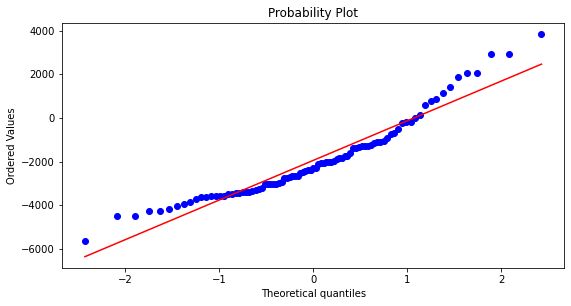

In [44]:
import scipy.stats as sp
fid,ax = plt.subplots(figsize=(9,4.5))
_,(_,__,r)=sp.probplot(residuals["SimpleExpSmoothing"], plot=ax, fit=True)

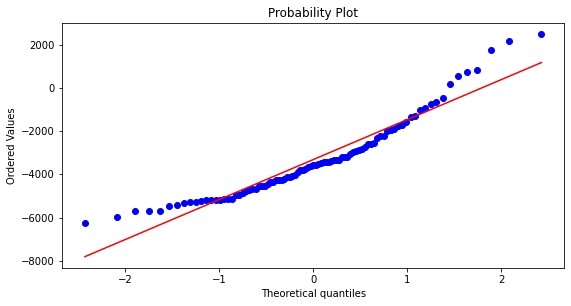

In [45]:
fid,ax = plt.subplots(figsize=(9,4.5))
_,(_,__,r)=sp.probplot(residuals["Holt Model"], plot=ax, fit=True)

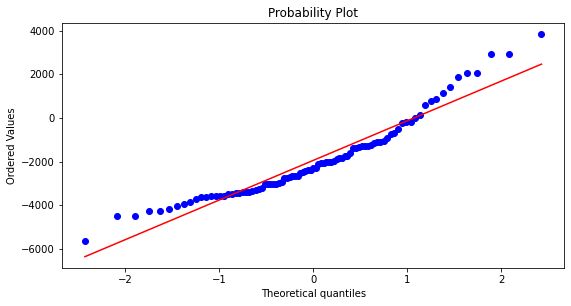

In [46]:
fid,ax = plt.subplots(figsize=(9,4.5))
_,(_,__,r)=sp.probplot(residuals["ExponentialSmoothing"], plot=ax, fit=True)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable

Text(0.5, 1.0, 'ExponentialSmoothing')

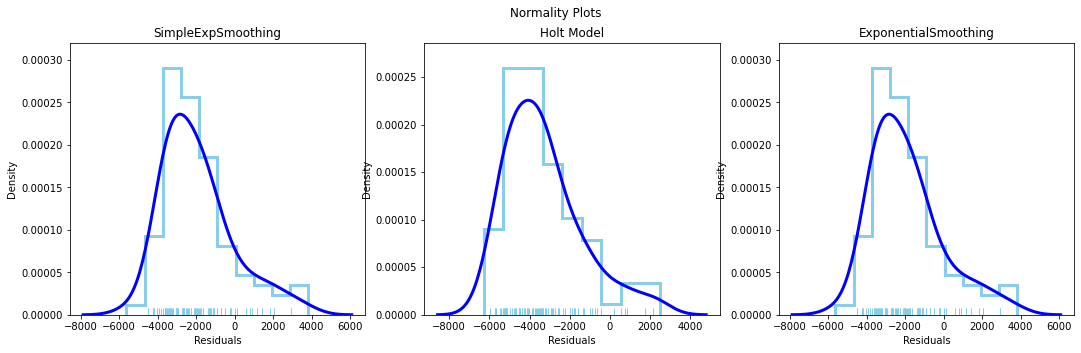

In [48]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

fig.suptitle("Normality Plots")

sns.distplot(ax=axes[0],x= residuals["SimpleExpSmoothing"],rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})
axes[0].set_title("SimpleExpSmoothing")
sns.distplot(ax=axes[1],x=residuals["Holt Model"],rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})
axes[1].set_title("Holt Model")
sns.distplot(ax=axes[2],x=residuals["ExponentialSmoothing"],rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})
axes[2].set_title("ExponentialSmoothing")


## Regression Extension Techniques for Time-Series Data

In [49]:
import pmdarima
from pmdarima.arima import auto_arima

In [50]:
#AR MODEL (Using AUTO-ARIMA)
model_ar= pmdarima.arima.auto_arima(y_train,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False, sarimax_kwargs=False)
model_ar.fit(y_train)
forecast_AR=model_ar.predict(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_AR))
print(model_ar.summary())



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16320.354, Time=0.98 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16166.314, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16111.949, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16066.376, Time=0.33 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.223 seconds
Evaluation metric results:-
MSE is : 15485534.818428656
MAE is : 2790.237824722893
RMSE is : 3935.1664283011787
MAPE is : 43.58572904404856
R2 is : -0.039841981615780675

None
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  900
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8028.188
Date:                Wed, 16 Jun 2021   AIC                          16066.376
Time:                        06:51:55   BIC                          16090.382
Sample:                             0   HQIC                         16075.547
     

In [51]:
forecast_ar = forecast_AR.reshape(96,1)
forecast_ar = pd.DataFrame(forecast_ar)
forecast_ar=forecast_ar.rename(columns={0:'AR'})
forecast_ar.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_ARforecasts_dataframe.csv",index = False,header=True)

In [52]:
actual_fore["Autoregressive"]=forecast_ar.values
AR=actual_fore

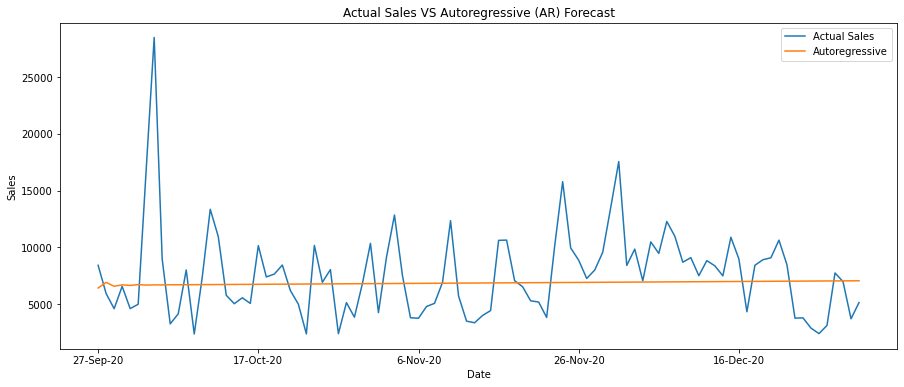

In [53]:
AR['Actual Sales'].plot(figsize=(15,6))
AR['Autoregressive'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Autoregressive (AR) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [78]:
print(model_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  900
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8028.188
Date:                Wed, 16 Jun 2021   AIC                          16066.376
Time:                        07:28:37   BIC                          16090.382
Sample:                             0   HQIC                         16075.547
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.8684     68.062      0.130      0.896    -124.530     142.267
ar.L1         -0.5529      0.023    -24.193      0.000      -0.598      -0.508
ar.L2         -0.3592      0.032    -11.298      0.0

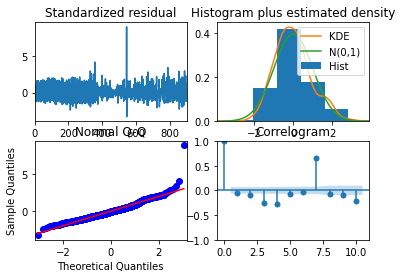

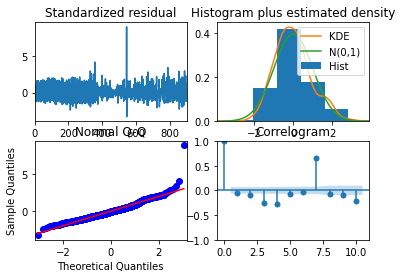

In [55]:
model_ar.plot_diagnostics()

In [56]:
#MA MODEL (Using AUTO-ARIMA)
model_ma= auto_arima(y_train,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=4,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(y_train)
forecast_MA = model_ma.predict(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_MA))
#print(model_ma.summary())



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16320.354, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15895.359, Time=1.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15880.797, Time=1.88 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15882.796, Time=2.72 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=15856.425, Time=3.03 sec

Best model:  ARIMA(0,1,4)(0,0,0)[0] intercept
Total fit time: 9.044 seconds
Evaluation metric results:-
MSE is : 15564344.832175463
MAE is : 2799.114873148512
RMSE is : 3945.167275563289
MAPE is : 43.387680716530916
R2 is : -0.045134014588908755

None


In [57]:
forecast_ma = forecast_MA.reshape(96,1)
forecast_ma = pd.DataFrame(forecast_ma)
forecast_ma=forecast_ma.rename(columns={0:'MA'})
forecast_ma.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_MAforecasts_dataframe.csv",index = False,header=True)

In [58]:
actual_fore["Moving Average"]=forecast_ma.values
MA=actual_fore

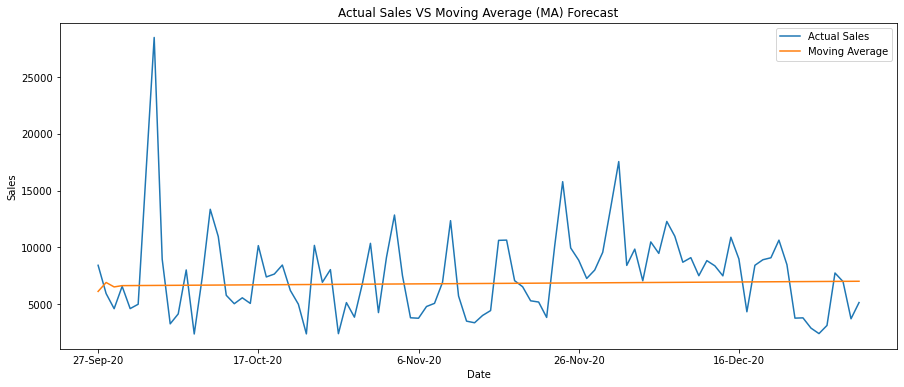

In [59]:
MA['Actual Sales'].plot(figsize=(15,6))
MA['Moving Average'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Moving Average (MA) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [79]:
print(model_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  900
Model:               SARIMAX(0, 1, 4)   Log Likelihood               -7922.213
Date:                Wed, 16 Jun 2021   AIC                          15856.425
Time:                        07:38:50   BIC                          15885.233
Sample:                             0   HQIC                         15867.430
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1836      9.160      0.457      0.648     -13.769      22.137
ma.L1         -0.7634      0.028    -26.988      0.000      -0.819      -0.708
ma.L2         -0.1734      0.045     -3.888      0.0

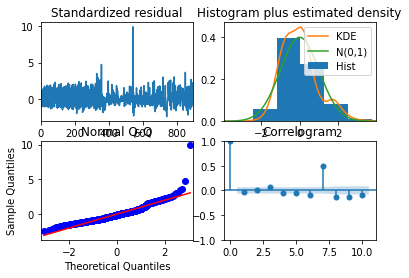

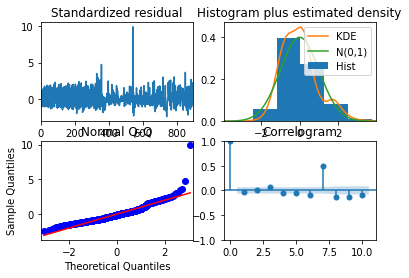

In [61]:
model_ma.plot_diagnostics()

In [62]:
# ARIMA MODEL
model_arima= auto_arima(y_train,start_p=0, start_q=0,
    max_p=3, max_q=3,max_d=2, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=False)
forecast_ARIMA = model_arima.predict(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_ARIMA))


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16320.354, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15895.359, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15880.797, Time=1.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15882.796, Time=2.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16166.314, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15881.698, Time=1.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15854.124, Time=3.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15854.598, Time=2.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16111.949, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15881.305, Time=2.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15854.780, Time=2.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15833.118, Time=3.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16066.376, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15867.996, Time=2.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15923.981, Time=3.10

In [63]:
forecast_arima = np.array(forecast_ARIMA).reshape(96,1)
forecast_arima = pd.DataFrame(forecast_arima)
forecast_arima=forecast_arima.rename(columns={0:'ARIMA'})
forecast_arima.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_ARIMAforecasts_dataframe.csv",index = False,header=True)

In [64]:
actual_fore["ARIMA"]=forecast_arima.values
ARIMA=actual_fore

In [65]:

#forecast_ARIMA.reshape(91,1)

In [66]:
#forecast_ARIMA.reshape(96,1)

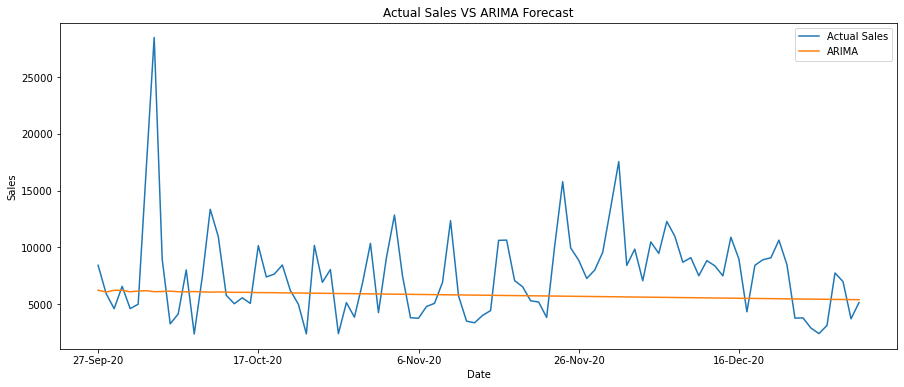

In [67]:
ARIMA['Actual Sales'].plot(figsize=(15,6))
ARIMA['ARIMA'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS ARIMA Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [80]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  900
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -7909.559
Date:                Wed, 16 Jun 2021   AIC                          15833.118
Time:                        07:48:52   BIC                          15866.727
Sample:                             0   HQIC                         15845.958
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -20.2489     19.084     -1.061      0.289     -57.653      17.155
ar.L1         -0.6631      0.055    -12.073      0.000      -0.771      -0.555
ar.L2         -0.7513      0.055    -13.564      0.0

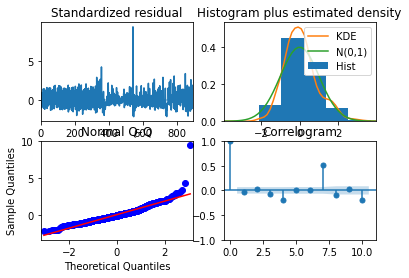

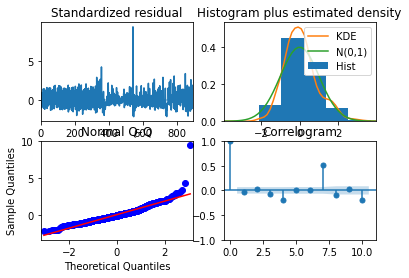

In [69]:
model_arima.plot_diagnostics()

In [70]:
#SARIMA MODEL (Using AUTO-ARIMA)
model_sarima= auto_arima(y_train,trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=3,max_q=3,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(y_train)
forecast_SARIMA=model_sarima.predict(len(y_test))
print(timeseries_evaluation_metrics_func(y_test,forecast_SARIMA))
#print(model_sarima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=15660.239, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=16320.354, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=15665.026, Time=1.49 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=15655.928, Time=3.77 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=16318.356, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=15895.359, Time=0.79 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=15390.889, Time=4.48 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=15508.949, Time=2.85 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=15452.062, Time=6.99 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=15516.218, Time=12.14 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=15584.184, Time=9.80 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=15448.381, Time=4.36 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=12.19 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=3.99 sec
 ARIMA(0,1,2)(1,0,1)[7] inter

In [71]:
forecast_sarima = np.array(forecast_SARIMA).reshape(96,1)
forecast_sarima = pd.DataFrame(forecast_sarima)
forecast_sarima=forecast_sarima.rename(columns={0:'SARIMA'})
forecast_sarima.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_SARIMAforecasts_dataframe.csv",index = False,header=True)

In [72]:
actual_fore["Seasonal ARIMA"]=forecast_sarima.values
SARIMA=actual_fore

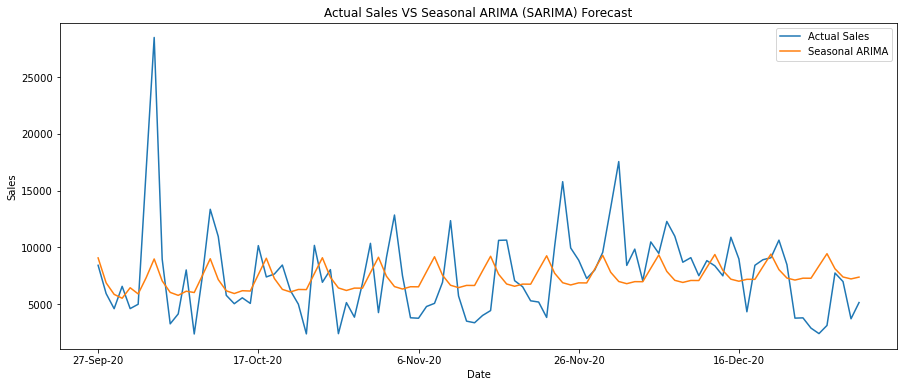

In [73]:
SARIMA['Actual Sales'].plot(figsize=(15,6))
SARIMA['Seasonal ARIMA'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Seasonal ARIMA (SARIMA) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [81]:
#forecast_SARIMA.reshape(91,1)
print(model_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  900
Model:             SARIMAX(0, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -7663.253
Date:                             Wed, 16 Jun 2021   AIC                          15338.506
Time:                                     07:57:35   BIC                          15367.314
Sample:                                          0   HQIC                         15349.512
                                             - 900                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6547      0.015    -42.802      0.000      -0.685      -0.625
ma.L2         -0.2462      

In [75]:
#forecast_SARIMA.reshape(96,1)

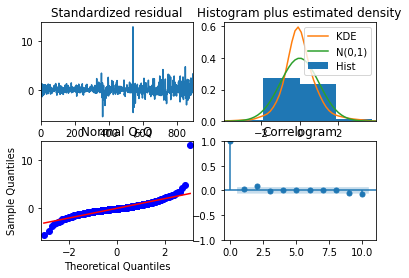

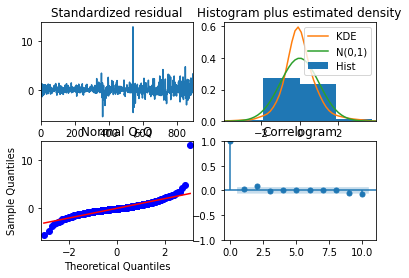

In [76]:
model_sarima.plot_diagnostics()

In [77]:
rmse = pd.read_csv("acc3.csv")
#rmse=rmse.set_index("Model", inplace =True)
import seaborn as sns
sns.set()
rmse

,Model,RMSE,MAPE,Method,Model Type
0,CNN-LSTM,5473.17,56.68,Deep Learning,Forecasting
1,RNN,4865.71,55.43,Deep Learning,Forecasting
2,CNN,4582.31,44.52,Deep Learning,Forecasting
3,Holt Model (DES),4575.92,69.06,Traditional,Forecasting
4,ARIMA,4264.99,40.12,Traditional,Forecasting
5,ConvlLSTM,4250.05,44.19,Deep Learning,Forecasting
6,SES,4077.77,41.47,Traditional,Forecasting
7,Holts-Winters (TES),4077.77,41.47,Traditional,Forecasting
8,DNN,4071.80,40.03,Deep Learning,Forecasting
9,MA,3946.09,43.37,Traditional,Forecasting


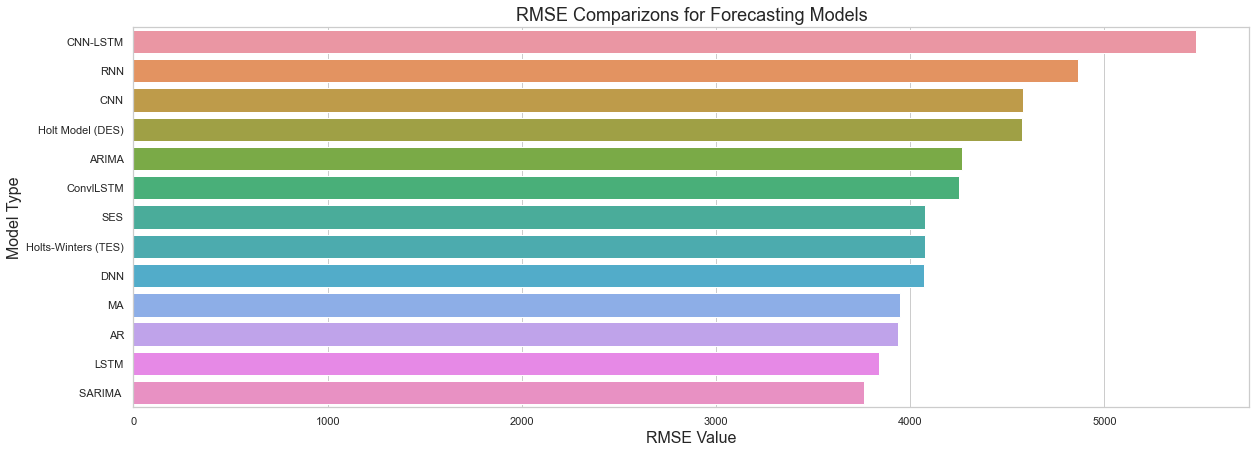

In [93]:
plt.rcParams['figure.figsize']= [20,7]
sns.set_style('darkgrid')
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x="RMSE", y = "Model", data=rmse)
plt.xlabel('RMSE Value',fontsize = 16)
plt.ylabel('Model Type',fontsize = 16)
plt.title('RMSE Comparizons for Forecasting Models',fontsize=18)
plt.show()

In [94]:
accuracy = pd.read_csv("acc.csv")
accuracy.head(2)

,Model,RMSE,Model Type
0,CNN-LSTM,5473.17,Deep Learning (Forecasting)
1,RNN,4865.71,Deep Learning (Forecasting)


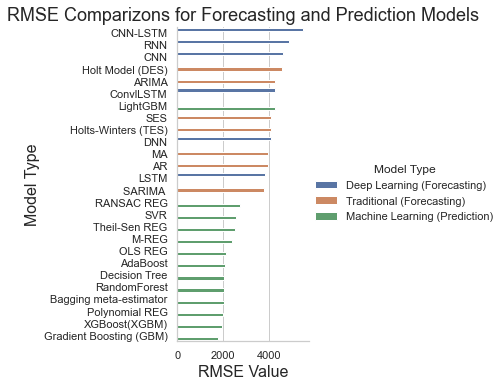

In [95]:
plt.rcParams['figure.figsize']= [40,14]
sns.set(rc={'figure.figsize':(40,14)})
sns.set_style('darkgrid')
sns.set_theme(style="whitegrid")
#sns.set_color_codes('pastel')
sns.catplot(x="RMSE", y= "Model", hue ="Model Type", kind = "bar", data = accuracy)
plt.xlabel('RMSE Value',fontsize = 16)
plt.ylabel('Model Type',fontsize = 16)
plt.title('RMSE Comparizons for Forecasting and Prediction Models',fontsize=18)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


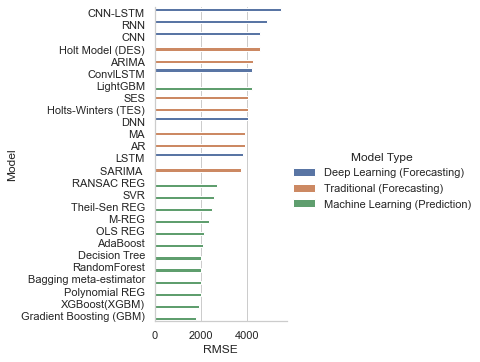

In [96]:
sns.factorplot(x="RMSE", y= "Model", hue ="Model Type", kind = "bar", data = accuracy)

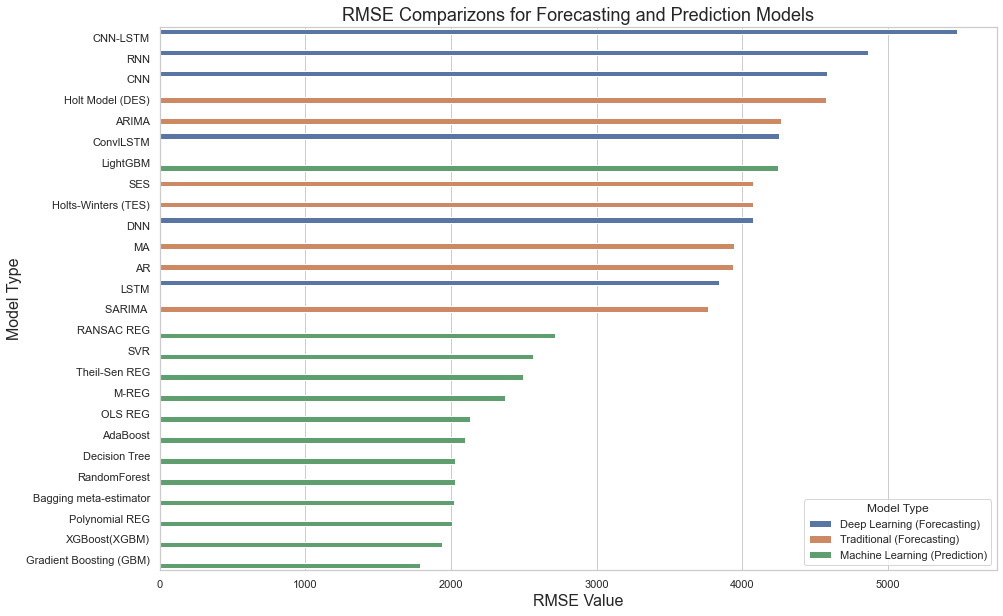

In [97]:
plt.rcParams['figure.figsize']= [15,10]
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('darkgrid')
sns.set_theme(style="whitegrid")
#sns.set_color_codes('pastel')
sns.barplot(x="RMSE", y= "Model", hue ="Model Type",data = accuracy)
plt.xlabel('RMSE Value',fontsize = 16)
plt.ylabel('Model Type',fontsize = 16)
plt.title('RMSE Comparizons for Forecasting and Prediction Models',fontsize=18)
plt.show()

In [98]:
bb = pd.read_csv("best.csv")

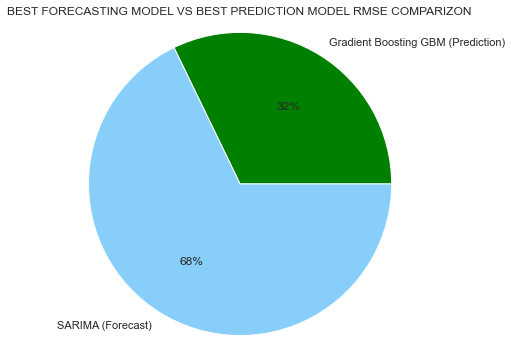

In [99]:
plt.rcParams['figure.figsize'] = (6,6)
colors = ["green","lightskyblue"]
plt.pie(bb["RMSE"], labels = bb["Model"], colors = colors, autopct = "%1.0f%%")
plt.axis("equal")
plt.title("BEST FORECASTING MODEL VS BEST PREDICTION MODEL RMSE COMPARIZON")
plt.show()

## Bleeding-Edge Techniques for Univariate Time Series 